In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [2]:
data_frame = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
data_frame['GRE Score'] = data_frame['GRE Score'] / data_frame['GRE Score'].max()
data_frame['TOEFL Score'] = data_frame['TOEFL Score'] / data_frame['TOEFL Score'].max()
data_frame['University Rating'] = data_frame['University Rating'] / data_frame['University Rating'].max()
data_frame['SOP'] = data_frame['SOP'] / data_frame['SOP'].max()
data_frame['LOR '] = data_frame['LOR '] / data_frame['LOR '].max()
data_frame['CGPA'] = data_frame['CGPA'] / data_frame['CGPA'].max()

In [4]:
mediaChance = data_frame['Chance of Admit '].mean()

data_frame[(data_frame[['Chance of Admit ']] >= mediaChance)] = 1
data_frame[(data_frame[['Chance of Admit ']] < mediaChance)] = 0

data_frame.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.991176,0.983333,0.8,0.9,0.9,0.972782,1,1.0
1,2,0.952941,0.891667,0.8,0.8,0.9,0.894153,1,1.0
2,3,0.929412,0.866667,0.6,0.6,0.7,0.806452,1,0.0
3,4,0.947059,0.916667,0.6,0.7,0.5,0.873992,1,1.0
4,5,0.923529,0.858333,0.4,0.4,0.6,0.827621,0,0.0


In [5]:
x = data_frame.drop(['Serial No.', 'Research', 'Chance of Admit '], axis=1)[['GRE Score', 'TOEFL Score', 'CGPA','SOP', 'LOR ','University Rating']]
y = data_frame['Chance of Admit ']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [6]:
model = Sequential()
model.add(Dense(128, input_shape=(6,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(2, activation="softmax"))

In [7]:
#transforma tudo de cada em parametro em 0 e 1 e coloca em uma lista
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
print("[INFO] treinando a rede neural...")
model.compile(optimizer=SGD(0.1), loss="categorical_crossentropy", metrics=["accuracy"])
train = model.fit(x=x_train, y=y_train, batch_size=128, epochs=500, verbose=2, validation_data=(x_test, y_test))

[INFO] treinando a rede neural...
Train on 375 samples, validate on 125 samples
Epoch 1/500
 - 0s - loss: 0.7594 - acc: 0.5120 - val_loss: 0.6978 - val_acc: 0.5520
Epoch 2/500
 - 0s - loss: 0.7049 - acc: 0.4880 - val_loss: 0.7208 - val_acc: 0.4480
Epoch 3/500
 - 0s - loss: 0.7092 - acc: 0.4907 - val_loss: 0.7239 - val_acc: 0.4480
Epoch 4/500
 - 0s - loss: 0.6976 - acc: 0.5040 - val_loss: 0.6968 - val_acc: 0.4480
Epoch 5/500
 - 0s - loss: 0.7069 - acc: 0.4587 - val_loss: 0.6980 - val_acc: 0.4480
Epoch 6/500
 - 0s - loss: 0.6946 - acc: 0.5120 - val_loss: 0.6904 - val_acc: 0.5520
Epoch 7/500
 - 0s - loss: 0.6955 - acc: 0.4853 - val_loss: 0.6878 - val_acc: 0.5520
Epoch 8/500
 - 0s - loss: 0.6998 - acc: 0.4907 - val_loss: 0.6874 - val_acc: 0.5520
Epoch 9/500
 - 0s - loss: 0.6966 - acc: 0.5173 - val_loss: 0.6981 - val_acc: 0.4480
Epoch 10/500
 - 0s - loss: 0.6929 - acc: 0.5920 - val_loss: 0.7037 - val_acc: 0.4480
Epoch 11/500
 - 0s - loss: 0.7080 - acc: 0.4587 - val_loss: 0.6948 - val_acc: 0

Epoch 97/500
 - 0s - loss: 0.6804 - acc: 0.6053 - val_loss: 0.6761 - val_acc: 0.7760
Epoch 98/500
 - 0s - loss: 0.6789 - acc: 0.5973 - val_loss: 0.6820 - val_acc: 0.5200
Epoch 99/500
 - 0s - loss: 0.6792 - acc: 0.5360 - val_loss: 0.6781 - val_acc: 0.7200
Epoch 100/500
 - 0s - loss: 0.6767 - acc: 0.6907 - val_loss: 0.6776 - val_acc: 0.7520
Epoch 101/500
 - 0s - loss: 0.6772 - acc: 0.6853 - val_loss: 0.6739 - val_acc: 0.7200
Epoch 102/500
 - 0s - loss: 0.6769 - acc: 0.5600 - val_loss: 0.6837 - val_acc: 0.4560
Epoch 103/500
 - 0s - loss: 0.6779 - acc: 0.5493 - val_loss: 0.6751 - val_acc: 0.8080
Epoch 104/500
 - 0s - loss: 0.6790 - acc: 0.5840 - val_loss: 0.6826 - val_acc: 0.4800
Epoch 105/500
 - 0s - loss: 0.6765 - acc: 0.6240 - val_loss: 0.6710 - val_acc: 0.5520
Epoch 106/500
 - 0s - loss: 0.6858 - acc: 0.4560 - val_loss: 0.6903 - val_acc: 0.4480
Epoch 107/500
 - 0s - loss: 0.6805 - acc: 0.5973 - val_loss: 0.6710 - val_acc: 0.5520
Epoch 108/500
 - 0s - loss: 0.6749 - acc: 0.6533 - val_lo

Epoch 193/500
 - 0s - loss: 0.6390 - acc: 0.6293 - val_loss: 0.6382 - val_acc: 0.5520
Epoch 194/500
 - 0s - loss: 0.6392 - acc: 0.5547 - val_loss: 0.6562 - val_acc: 0.5440
Epoch 195/500
 - 0s - loss: 0.6364 - acc: 0.7520 - val_loss: 0.6363 - val_acc: 0.7920
Epoch 196/500
 - 0s - loss: 0.6383 - acc: 0.7627 - val_loss: 0.6499 - val_acc: 0.5920
Epoch 197/500
 - 0s - loss: 0.6389 - acc: 0.7307 - val_loss: 0.6550 - val_acc: 0.5440
Epoch 198/500
 - 0s - loss: 0.6366 - acc: 0.6960 - val_loss: 0.6452 - val_acc: 0.6240
Epoch 199/500
 - 0s - loss: 0.6327 - acc: 0.6853 - val_loss: 0.6307 - val_acc: 0.8160
Epoch 200/500
 - 0s - loss: 0.6320 - acc: 0.7893 - val_loss: 0.6321 - val_acc: 0.7680
Epoch 201/500
 - 0s - loss: 0.6311 - acc: 0.8187 - val_loss: 0.6424 - val_acc: 0.6400
Epoch 202/500
 - 0s - loss: 0.6346 - acc: 0.7387 - val_loss: 0.6598 - val_acc: 0.5360
Epoch 203/500
 - 0s - loss: 0.6412 - acc: 0.6160 - val_loss: 0.6808 - val_acc: 0.4560
Epoch 204/500
 - 0s - loss: 0.6438 - acc: 0.6160 - val

Epoch 289/500
 - 0s - loss: 0.5330 - acc: 0.7787 - val_loss: 0.5428 - val_acc: 0.7600
Epoch 290/500
 - 0s - loss: 0.5336 - acc: 0.7573 - val_loss: 0.5296 - val_acc: 0.7920
Epoch 291/500
 - 0s - loss: 0.5266 - acc: 0.8000 - val_loss: 0.5260 - val_acc: 0.8160
Epoch 292/500
 - 0s - loss: 0.5310 - acc: 0.7920 - val_loss: 0.5460 - val_acc: 0.7520
Epoch 293/500
 - 0s - loss: 0.5223 - acc: 0.8107 - val_loss: 0.5278 - val_acc: 0.7680
Epoch 294/500
 - 0s - loss: 0.5269 - acc: 0.7840 - val_loss: 0.5243 - val_acc: 0.7680
Epoch 295/500
 - 0s - loss: 0.5421 - acc: 0.7360 - val_loss: 0.5235 - val_acc: 0.7840
Epoch 296/500
 - 0s - loss: 0.5172 - acc: 0.8160 - val_loss: 0.5312 - val_acc: 0.7840
Epoch 297/500
 - 0s - loss: 0.5167 - acc: 0.7973 - val_loss: 0.5183 - val_acc: 0.8000
Epoch 298/500
 - 0s - loss: 0.5268 - acc: 0.7600 - val_loss: 0.5178 - val_acc: 0.7920
Epoch 299/500
 - 0s - loss: 0.5129 - acc: 0.8027 - val_loss: 0.5226 - val_acc: 0.7840
Epoch 300/500
 - 0s - loss: 0.5113 - acc: 0.8187 - val

Epoch 385/500
 - 0s - loss: 0.4286 - acc: 0.8053 - val_loss: 0.4781 - val_acc: 0.7680
Epoch 386/500
 - 0s - loss: 0.4283 - acc: 0.8187 - val_loss: 0.4557 - val_acc: 0.7680
Epoch 387/500
 - 0s - loss: 0.4296 - acc: 0.8027 - val_loss: 0.4488 - val_acc: 0.7920
Epoch 388/500
 - 0s - loss: 0.4313 - acc: 0.8160 - val_loss: 0.4656 - val_acc: 0.7760
Epoch 389/500
 - 0s - loss: 0.4553 - acc: 0.7840 - val_loss: 0.5061 - val_acc: 0.7360
Epoch 390/500
 - 0s - loss: 0.4748 - acc: 0.7520 - val_loss: 0.4640 - val_acc: 0.7680
Epoch 391/500
 - 0s - loss: 0.4317 - acc: 0.8160 - val_loss: 0.4484 - val_acc: 0.7760
Epoch 392/500
 - 0s - loss: 0.4231 - acc: 0.8347 - val_loss: 0.4765 - val_acc: 0.7680
Epoch 393/500
 - 0s - loss: 0.4440 - acc: 0.7920 - val_loss: 0.4474 - val_acc: 0.8080
Epoch 394/500
 - 0s - loss: 0.4396 - acc: 0.8080 - val_loss: 0.4485 - val_acc: 0.7840
Epoch 395/500
 - 0s - loss: 0.4409 - acc: 0.8107 - val_loss: 0.4544 - val_acc: 0.7760
Epoch 396/500
 - 0s - loss: 0.4247 - acc: 0.8133 - val

Epoch 481/500
 - 0s - loss: 0.4021 - acc: 0.8160 - val_loss: 0.4427 - val_acc: 0.7680
Epoch 482/500
 - 0s - loss: 0.4034 - acc: 0.8000 - val_loss: 0.4401 - val_acc: 0.8160
Epoch 483/500
 - 0s - loss: 0.4067 - acc: 0.7867 - val_loss: 0.4377 - val_acc: 0.8080
Epoch 484/500
 - 0s - loss: 0.4031 - acc: 0.8080 - val_loss: 0.4369 - val_acc: 0.7760
Epoch 485/500
 - 0s - loss: 0.3996 - acc: 0.8107 - val_loss: 0.4630 - val_acc: 0.7760
Epoch 486/500
 - 0s - loss: 0.4072 - acc: 0.7947 - val_loss: 0.4543 - val_acc: 0.7760
Epoch 487/500
 - 0s - loss: 0.4215 - acc: 0.7813 - val_loss: 0.4645 - val_acc: 0.7840
Epoch 488/500
 - 0s - loss: 0.4045 - acc: 0.8053 - val_loss: 0.4602 - val_acc: 0.7760
Epoch 489/500
 - 0s - loss: 0.4222 - acc: 0.7920 - val_loss: 0.4370 - val_acc: 0.7920
Epoch 490/500
 - 0s - loss: 0.4132 - acc: 0.8107 - val_loss: 0.4514 - val_acc: 0.7600
Epoch 491/500
 - 0s - loss: 0.4024 - acc: 0.8080 - val_loss: 0.4780 - val_acc: 0.7680
Epoch 492/500
 - 0s - loss: 0.4939 - acc: 0.7707 - val

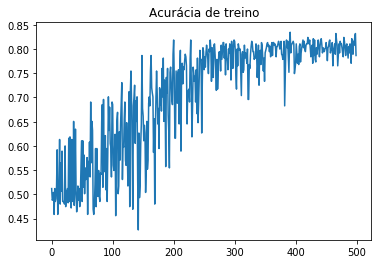

In [9]:
plt.title("Acurácia de treino")
plt.plot(train.history['acc'])
plt.show()

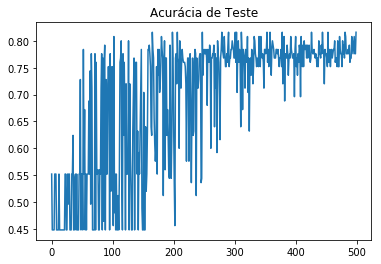

In [10]:
plt.title("Acurácia de Teste")
plt.plot(train.history['val_acc'])
plt.show()